
## Print figures of coarsened Himawari cloud mask (distributed)


In [1]:
import os,sys
from glob import glob
#
import xarray as xr
from dask import compute, delayed
#from dask.distributed import Client
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# 
from datetime import datetime
#
from utils import *

# tmp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

r2d = 180./np.pi

In [2]:
# data path
dpath = '/home/datawork-lops-osi/data/hw/mask/'
figdir = '/home1/datawork/aponte/hw/figs/'
#
dpath = './'
figdir = './figs/'

filenames = sorted(glob(dpath+'*CLPbet*.nc'))
for f in filenames[:]: print(f)
print('Number of files available: %d' %len(filenames))
Nfiles = len(filenames)
print('Number of files processed: %d' %len(filenames))

#time = [datetime.strptime(f,dpath+'NC_H08_%Y%m%d_%H%M_L2CLPbet_FLDK.02401_02401.nc') for f in filenames]

./NC_H08_20160314_0430_L2CLPbet_FLDK.02401_02401.nc
./NC_H08_20160314_0730_L2CLPbet_FLDK.02401_02401.nc
./NC_H08_20160314_0830_L2CLPbet_FLDK.02401_02401.nc
./NC_H08_20180128_0930_L2CLPbet_FLDK.02401_02401.nc
Number of files available: 4
Number of files processed: 4


In [3]:
# coarsen factor [deg]
dl = 0.5
chunks={'longitude': 200}

# select one file
f = filenames[1]
time = datetime.strptime(f,dpath+'NC_H08_%Y%m%d_%H%M_L2CLPbet_FLDK.02401_02401.nc')
print(time)

# open file
mask = xr.open_dataset(f)['QA']
# massage the mask to get cloud flag
fmask = process_raw_mask(mask)
# coarsen fields
cmask = coarsen(fmask, dl, chunks)

2016-03-14 07:30:00


In [4]:
# computes relevant angles
angles, sun, hw = get_reflection_angles(cmask['longitude'], cmask['latitude'], time)

Sun zenith location: lon=69.7, lat=-2.3
Himawari position: sublong=140.684289 sublat=-0.015264


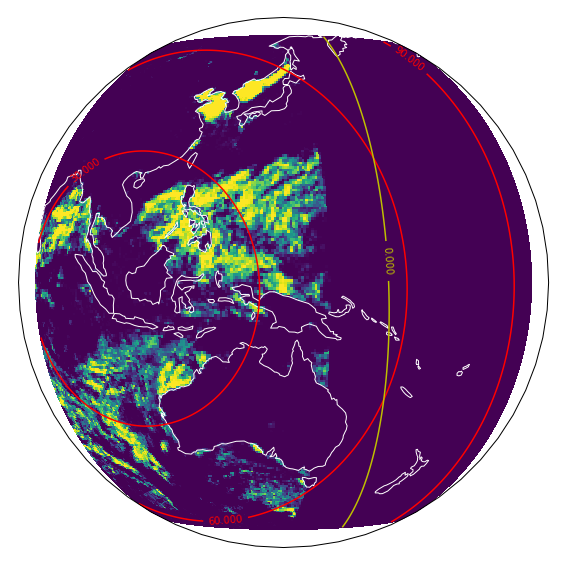

In [5]:
crs = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=ccrs.Geostationary(central_longitude=140.0))
cmask['QA'].plot.pcolormesh(ax=ax, transform=crs, x='longitude', y='latitude',add_colorbar=False)
im = (angles['angle2spec']*r2d).plot.contour(levels=[-60.,-30.,0.,30., 60., 90.], colors=['r'],ax=ax, transform=crs, \
                                             x='longitude', y='latitude', add_labels=True)
im.clabel()
im = (angles['sun_alt']*r2d).plot.contour(levels=[0.], colors=['y'],ax=ax, transform=crs, \
                                             x='longitude', y='latitude', add_labels=True)
im.clabel()
ax.coastlines(color='w')
plt.show()

In [6]:
# I am not sure why this does not work, contours don't want to show up for some reason
#crs = ccrs.PlateCarree()
#fig, ax = plot_mask(cmask['QA'], colorbar=False, title=title, offline=False)
#im = (angles['angle2spec']*r2d).plot.contour(levels=[90.], colors=['r'],ax=ax, transform=crs, x='longitude', y='latitude')
#plt.show()

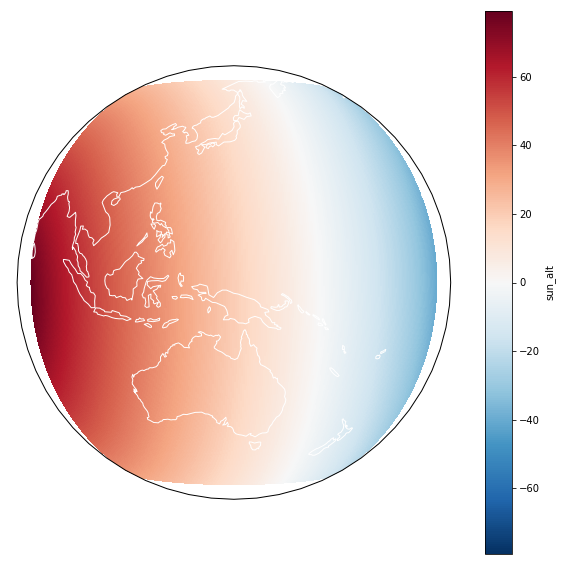

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=ccrs.Geostationary(central_longitude=140.0))
(angles['sun_alt']*r2d).plot(ax=ax, transform=crs, x='longitude', y='latitude')
ax.coastlines(color='w')
plt.show()

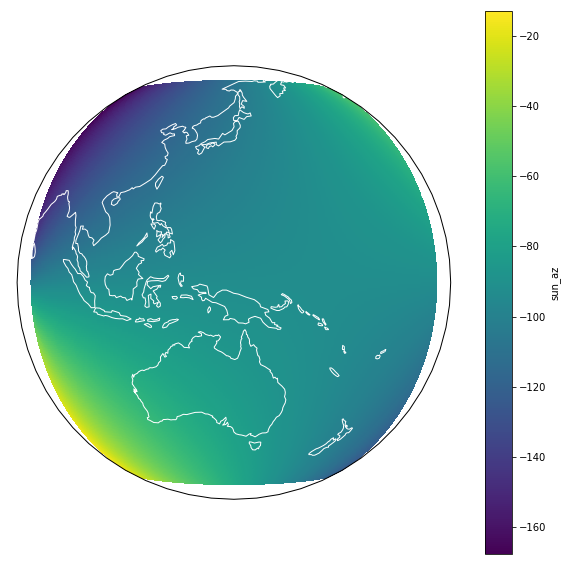

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=ccrs.Geostationary(central_longitude=140.0))
(angles['sun_az']*r2d).plot(ax=ax, transform=crs, x='longitude', y='latitude')
ax.coastlines(color='w')
plt.show()

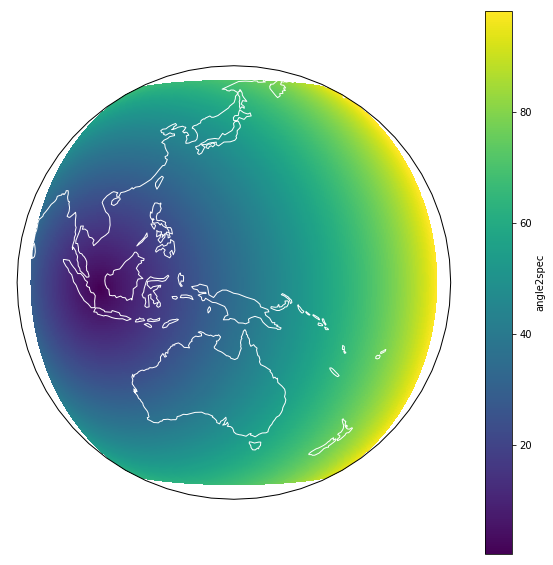

In [9]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=ccrs.Geostationary(central_longitude=140.0))
(angles['angle2spec']*r2d).plot.pcolormesh(ax=ax, transform=crs, \
                                          x='longitude', y='latitude', add_colorbar=True)
ax.coastlines(color='w')
plt.show()

---

# Processes for multiple files

2016-03-14 04:30:00
Sun zenith location: lon=114.8, lat=-2.4
Himawari position: sublong=140.675532 sublat=-0.007202


/Users/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


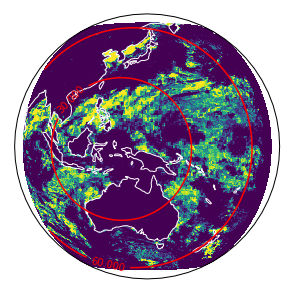

2016-03-14 07:30:00
Sun zenith location: lon=69.7, lat=-2.3
Himawari position: sublong=140.684289 sublat=-0.015264


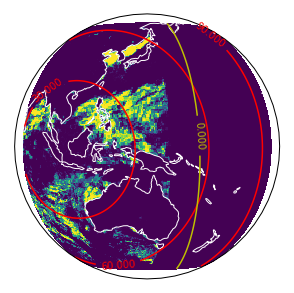

2016-03-14 08:30:00
Sun zenith location: lon=54.8, lat=-2.3
Himawari position: sublong=140.685969 sublat=-0.016018


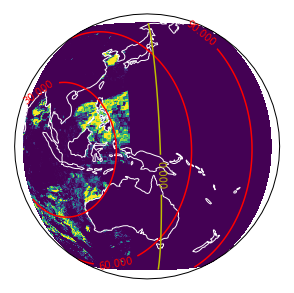

In [10]:
# select one file
for f in filenames[:3]:
    time = datetime.strptime(f,dpath+'NC_H08_%Y%m%d_%H%M_L2CLPbet_FLDK.02401_02401.nc')
    print(time)
    # open file
    mask = xr.open_dataset(f)['QA']
    # massage the mask to get cloud flag
    fmask = process_raw_mask(mask)
    # coarsen fields
    cmask = coarsen(fmask, dl, chunks)
    
    # compute angles
    angles, sun, hw = get_reflection_angles(cmask['longitude'], cmask['latitude'], time)
    
    # plot
    crs = ccrs.PlateCarree()
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection=ccrs.Geostationary(central_longitude=140.0))
    cmask['QA'].plot.pcolormesh(ax=ax, transform=crs, x='longitude', y='latitude',add_colorbar=False)
    im = (angles['angle2spec']*r2d).plot.contour(levels=[-60.,-30.,0.,30., 60., 90.], colors=['r'],ax=ax, transform=crs, \
                                                 x='longitude', y='latitude', add_labels=True)
    im.clabel()
    im = (angles['sun_alt']*r2d).plot.contour(levels=[0.], colors=['y'],ax=ax, transform=crs, \
                                                 x='longitude', y='latitude', add_labels=True)
    im.clabel()
    ax.coastlines(color='w')
    plt.show()
    